# Summer School of Data Science - Split '17

# 1. Introduction to Machine Learning with TensorFlow

This hands-on session serves as an introductory course for essential TensorFlow usage and basic machine learning with TensorFlow. This notebook is partly based on and follow the approach of chapter 6 of the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville, available at: http://www.deeplearningbook.org/.

Other useful tutorials exist in the form of Jupyter notebooks, some of which are:
- https://github.com/udacity/deep-learning
- https://github.com/DataScienceUB/DeepLearningfromScratch

This notebook covers basic TensorFlow usage concepts, which are then applied to elementary machine learning models like linear and logistic regression, and finally a simple multilayer perceptron is built and trained using the established TensorFlow concepts.

## Basic TensorFlow concepts

TensorFlow is an open source Python library which provides multiple APIs for buidling and evaluating computational graphs. These graphs can be used to represent any machine learning model, and TensorFlow provides methods for efficient optimization and evaluation of the models. The programmer's guide for TensorFlow can be found at https://www.tensorflow.org/programmers_guide/, and the full documentation is availale at https://www.tensorflow.org/api_docs/python/.

The import statement for TensorFlow programs is: `import tensorflow as tf`. This provides access to all TensorFlow APIs, classes, methods and symbols. 

In [1]:
import tensorflow as tf

### Tensor

The basic concept behind TensorFlow is the tensor - an n-dimensional array of a base datatype. In TensorFlow it is represented by the `tf.Tensor` object which will produce a value when evaluated. A `tf.Tensor` object has a shape (which defines the structure of the elements) and a data type, shared by all the elements in the Tensor. The main types of tensors are:
- Constant
- Variable
- Placeholder

The [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant) method creates a constant tensor, populated with values of a data type, specified by arguments `value`, `shape` (optional), [`dtype`](https://www.tensorflow.org/api_docs/python/tf/DType) (optional).

In [2]:
# create a TensorFlow constant tensor
t = tf.constant(5)
print(t)

Tensor("Const:0", shape=(), dtype=int32)


In [3]:
# create a TensorFlow constant of a specific data type and shape
t = tf.constant(7,shape=[2,3],dtype=tf.float32,name="const_tensor")
print(t)

Tensor("const_tensor:0", shape=(2, 3), dtype=float32)


However, any Tensor is only evaluated within a [`Session`](https://www.tensorflow.org/api_docs/python/tf/Session), which is the environment in which all tensors and operations are executed.

In [4]:
# create a TensorFlow session and evaluate the created constant
sess=tf.Session()
print(sess.run(t))

[[ 7.  7.  7.]
 [ 7.  7.  7.]]


Other very common and useful methods for creating tensors of constant value are [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) and [`tf.ones()`](https://www.tensorflow.org/api_docs/python/tf/ones).

In [5]:
# create a tensor of any shape populated with zeros and check within the session
t = tf.zeros([3,2,2])
print(sess.run(t))

[[[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]]]


In [6]:
# create a tensor of any shape populated with ones and check within the session
t = tf.ones([2,4])
print(sess.run(t))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


Tensors containing random values from various distribution can be created using a number of methods, with the most commonly used being [`tf.random_uniform()`](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [`tf.random_normal()`](https://www.tensorflow.org/api_docs/python/tf/random_normal).

In [7]:
# create a random tensor containing values from a uniform distribution between 10 and 20
t = tf.random_uniform([3,4,2],minval=10,maxval=20)
print(t)
print(sess.run(t))

Tensor("random_uniform:0", shape=(3, 4, 2), dtype=float32)
[[[ 16.83423424  12.7082653 ]
  [ 17.87173653  12.05112267]
  [ 10.16734123  17.5232811 ]
  [ 11.0253067   17.1642189 ]]

 [[ 16.27947998  19.20880699]
  [ 13.15979576  17.601614  ]
  [ 14.10945988  18.1970787 ]
  [ 15.78850937  17.66868401]]

 [[ 13.94125748  15.40588951]
  [ 15.38523674  17.21222687]
  [ 17.30607224  11.45663071]
  [ 18.22287369  16.17138481]]]


Simple algebraic operations such as `+`,`-`,`/`,and `*` can be used with tensors in this form, or by calling [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add), [`tf.subtract()`](https://www.tensorflow.org/api_docs/python/tf/subtract), [`tf.divide()`](https://www.tensorflow.org/api_docs/python/tf/divide), or [`tf.multiply()`](https://www.tensorflow.org/api_docs/python/tf/multiply). These are all element-wise, and defined for tensors of equal shapes and data-types. Tensors can be cast into a specific data type by calling [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [8]:
# add a scalar to a tensor
a = tf.ones([3,2])
sess.run(a+3)

array([[ 4.,  4.],
       [ 4.,  4.],
       [ 4.,  4.]], dtype=float32)

In [9]:
# subtract two tensors
a = tf.constant(4.,shape=[2,3])
print(a)
b = tf.random_normal(shape=[2,3])
print(b)
sess.run(a-b)

Tensor("Const_1:0", shape=(2, 3), dtype=float32)
Tensor("random_normal:0", shape=(2, 3), dtype=float32)


array([[ 3.76239157,  5.0288825 ,  2.72073221],
       [ 4.68344164,  3.4789114 ,  2.83210611]], dtype=float32)

In [10]:
# divide two integer tensors
a = tf.constant(4,shape=[2,3])
b = tf.constant(7,shape=[2,3])
print(a/b)


Tensor("truediv:0", shape=(2, 3), dtype=float64)


Other very useful operations include:
- Absolute value (modulus) - [`tf.abs()`](https://www.tensorflow.org/api_docs/python/tf/abs)
- Exponentiation with $e$ - [`tf.exp()`](https://www.tensorflow.org/api_docs/python/tf/exp)
- Square and other powers - [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/square) and [`tf.pow()`](https://www.tensorflow.org/api_docs/python/tf/pow)
- Matrix multiplication - [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/matmul)
- Transpose - [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose)

In [11]:
# try out varied mathematical operations with various tensors
a = tf.exp(tf.random_normal(shape=[3,2]))
print(sess.run(a))
b = tf.matmul(a,tf.transpose(a))
print(sess.run(b))



[[ 0.53116924  2.12819934]
 [ 4.25643158  3.49265838]
 [ 1.98903203  0.74123877]]
[[  0.4170498    1.57493806   5.78904486]
 [  1.57493806   6.16942215  23.66168785]
 [  5.78904486  23.66168785  94.96226501]]


### Placeholders and Variables

Placeholders and Vairables are special kinds of tensors which are the essential building blocks of more complex data and computation streams. These are the most commonly used types of tensors in TensorFlow. 

A [Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) is a tensor which acts like a "promise" to provide a value at the evaluation of the computational graph. Placeholders are mostly used as input points in the computational graph where data will be provided. It will produce an error when evaluated, unless the value is fed to the session.

In [12]:
# create a placeholder and feed it a value in a session
a = tf.placeholder(dtype=tf.float32)
b = tf.exp(a)
print(b)
print(sess.run(b,feed_dict={a:5}))

# create two placeholders and a tensor implementing matrix multiplication 
x1 = tf.placeholder(dtype=tf.float32)
x2 = tf.placeholder(dtype=tf.float32)
y = tf.matmul(x1,x2)
print(sess.run(y,{x2:[[1,2],[3,4]],x1:[[1,2],[3,4]]}))

Tensor("Exp_1:0", dtype=float32)
148.413
[[  7.  10.]
 [ 15.  22.]]


A [Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) is a tensor which allows the addition of trainable parameters to the computational graph. Constants are intialized when created, as opposed to variables, which need to be initialized within the session (and the initialization procedure must be defined). Variables can be "manually" assigned a new value using [`tf.assign`](https://www.tensorflow.org/api_docs/python/tf/assign), and their state is kept within the session object. This is mostly used for model training, during which variables are changed within the optimization process. 

In [13]:
# create a variable, initialize it, and assign a new value within a session
sess = tf.Session()
a = tf.Variable(5)
print(a)
sess.run(tf.global_variables_initializer())
sess.run(a)
sess.run(tf.assign(a,6))
print(sess.run(a))

sess.close()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(a))

<tf.Variable 'Variable:0' shape=() dtype=int32_ref>
6
5


## Linear regression in TensorFlow

Linear regression is one of the simplest and most commonly used regression models. The multivariate linear regression can be written as: 

$$y = w^{T}x + b$$

where $y \in \mathbb{R}$ is the output, $w \in \mathbb{R}^{p}$ is a column vector containing $p$ weights for $p$ features in $x \in \mathbb{R}^{p}$, and $b \in \mathbb{R}$ is the bias. The parameters contained in $w$ and $b$ are also called coefficients and are trained by using a gradient descent algorithm.


### Exercise:

Let us build a univariate linear regression model for a simple problem, using the previously introduced TensorFlow concepts:
- The model input $x$ is a placeholder for data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where data will be provided for training purpose

In [14]:
#define placeholders for data
x = tf.placeholder(dtype=tf.float32,shape=[None])
y = tf.placeholder(dtype=tf.float32,shape=[None])

#define model parameters as variables
w = tf.Variable(tf.random_normal(shape=()))
b = tf.Variable(tf.random_normal([]))

#create a tensor which calculates the model output
y_model = w*x + b

To train a model built in TensorFlow, a loss function needs to be defined, most commonly as a [reduction](https://www.tensorflow.org/api_guides/python/math_ops#Reduction) operation. An [optimizer](https://www.tensorflow.org/api_guides/python/train#Optimizers) object needs to be defined, and the [`minimize()`](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called in order to update the variables defined within the model to minimize the selected loss function. When creating optimizer objects, choices about the learning rate have to be made - these, in combination with the number of training epochs, can greatly influence the model training process. With the approapriate learning rate, the optimization can quickly converge.

In [15]:
#define the loss function as the mean of all squared errors (MSE)
loss = tf.reduce_mean(tf.square(y_model-y))

#create a gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.1)

#create a train operation
train = optimizer.minimize(loss)

#generate data to train the regression
import numpy as np
x_train = np.random.normal(size=10)
y_train = 5*x_train + 10 + np.random.normal(size=10)/10
print(x_train,y_train)

#initialize variables, run 100 epochs of training algorithm
sess.run(tf.global_variables_initializer())
for epoch in range(100):
    sess.run(train,{y:y_train,x:x_train})
    print('w:',sess.run(w),', b:',sess.run(b),', loss:',sess.run(loss,{y:y_train,x:x_train}))


[-1.24455598  0.54034035  0.67284074 -0.31131036 -1.54162209 -0.82222324
 -0.4128549  -1.02316814 -0.27822906  0.8220521 ] [  3.86083594  12.62098343  13.4825515    8.34129937   2.34952128
   5.802013     7.89253573   4.99876662   8.6800274   14.12025928]
w: 1.69321 , b: 1.86731 , loss: 55.0208
w: 1.59488 , b: 3.25869 , loss: 37.6063
w: 1.61127 , b: 4.36472 , loss: 26.5811
w: 1.70484 , b: 5.25072 , loss: 19.3754
w: 1.8483 , b: 5.96626 , loss: 14.503
w: 2.022 , b: 6.54901 , loss: 11.0944
w: 2.21188 , b: 7.02772 , loss: 8.63271
w: 2.40806 , b: 7.42435 , loss: 6.80452
w: 2.6037 , b: 7.75578 , loss: 5.41489
w: 2.79419 , b: 8.035 , loss: 4.33898
w: 2.97653 , b: 8.27208 , loss: 3.49415
w: 3.14889 , b: 8.47488 , loss: 2.82378
w: 3.3103 , b: 8.64952 , loss: 2.28779
w: 3.46034 , b: 8.80085 , loss: 1.8569
w: 3.59903 , b: 8.93271 , loss: 1.50917
w: 3.72665 , b: 9.04818 , loss: 1.22777
w: 3.84365 , b: 9.14975 , loss: 0.999633
w: 3.95062 , b: 9.23942 , loss: 0.814426
w: 4.04817 , b: 9.31886 , loss:

## Logistic Regression

Logistic regression is a very common and simple linear model for classification purposes, based on linear regression and the logistic function:

$$y = \frac{1}{1+e^{-(w^{T}x + b)}}$$

Due to the nature of the logistic function, it produces output values in the range $[0,1]$, thus providing a probability for each class given in the output. Similar to linear regression, the variables defined within the logistic regression model are parameters trainable by various optimization algorithms.

Let us build a logistic regression for the well-known XOR problem.

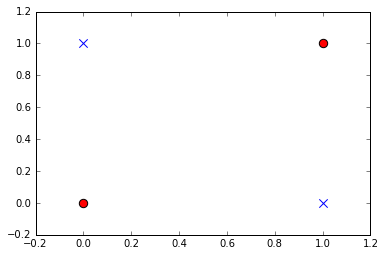

In [16]:
#generate XOR training data
import numpy as np
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

#import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt

#logical indices of data where the outputs are 1 and 0
t = np.where(y_train==1)[0]
f = np.where(y_train==0)[0]

#scatter plot of the data
plt.scatter(x_train[t,0],x_train[t,1],c='b',marker='x',s=70)
plt.scatter(x_train[f,0],x_train[f,1],c='r',marker='o',s=70)

### Exercise:
- The model input $x$ is a placeholder for a data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where output data will be provided in order to train the model

In [17]:
#define placeholders for the data
x = tf.placeholder(dtype=tf.float32,shape=[None,2])
y = tf.placeholder(dtype=tf.float32,shape=[None,1])

#define variables for the trainable parameters of the model
w = tf.Variable(tf.random_normal([2,1]),name="weights")
b = tf.Variable(tf.random_normal([1]), name="bias")

#create a tensor to calculate the model output
y_model = 1/(1+tf.exp(-(tf.matmul(x,w) + b)))

#define the loss function, create the optimizer and the training operation
loss = tf.reduce_mean(tf.square(y_model-y))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

#train the model
sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train,{x:x_train,y:y_train})
    print('w:',sess.run(w,{y:y_train,x:x_train}),', b:',sess.run(b,{y:y_train,x:x_train}),', loss:',sess.run(loss,{y:y_train,x:x_train}))


w: [[-1.02229416]
 [ 0.75775838]] , b: [ 0.93021137] , loss: 0.312112
w: [[-1.02493966]
 [ 0.73862422]] , b: [ 0.90882725] , loss: 0.309364
w: [[-1.027354  ]
 [ 0.71971798]] , b: [ 0.88780278] , loss: 0.306703
w: [[-1.02952194]
 [ 0.70107347]] , b: [ 0.86716753] , loss: 0.304133
w: [[-1.03142953]
 [ 0.68272233]] , b: [ 0.84694862] , loss: 0.301661
w: [[-1.03306508]
 [ 0.66469371]] , b: [ 0.82717061] , loss: 0.29929
w: [[-1.03441858]
 [ 0.64701402]] , b: [ 0.80785525] , loss: 0.297026
w: [[-1.03548217]
 [ 0.62970668]] , b: [ 0.78902119] , loss: 0.294868
w: [[-1.03625   ]
 [ 0.61279207]] , b: [ 0.77068412] , loss: 0.292819
w: [[-1.03671849]
 [ 0.59628731]] , b: [ 0.75285655] , loss: 0.290878
w: [[-1.03688562]
 [ 0.58020645]] , b: [ 0.7355479] , loss: 0.289044
w: [[-1.03675163]
 [ 0.56456041]] , b: [ 0.71876472] , loss: 0.287315
w: [[-1.03631818]
 [ 0.54935712]] , b: [ 0.70251071] , loss: 0.285688
w: [[-1.03558874]
 [ 0.53460163]] , b: [ 0.68678683] , loss: 0.284161
w: [[-1.03456795]
 [ 0

Inspect the trained model parameters and the model outputs. What is the minimum found by the optimizer?

In [18]:
print(sess.run(y_model,{x:x_train}))

[[ 0.50037587]
 [ 0.50007677]
 [ 0.50004137]
 [ 0.49974227]]


## Multilayer Perceptron

A multilayer perceptron is a feedforward network that can be thought of a model composed of multiple nested functions, for instance:

$$y = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

This means that the output of each function is routed as the input of the next function, and this operational and data flow is strictly one-directional (thus "feedforward") and may contain multiple layers of nested functions (thus "deep"). TensorFlow is a very suitable tool for building and training such models. Here we will consider the XOR problem once again, and build a multilayer perceptron to classify the data correctly.

It was demonstrated previously that the XOR data are not linearly separable - this means that a non-linear layer (function) within the model is needed to tranform the problem to a linearly separable space. This is in fact the core of the multilayer perceptron as well as other deep learning models - nonlinear activation functions such as the logistic function, $tanh$, or ReLU. A comprehensive guide for TensorFlow supported functions can be found in: https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_.

Let us build a multilayer perceptron model where the sigmoid activation function is used for the hiddern layer. Let:
- $f^{(1)}(x) = W^{(1)}x + b^{(1)}$
- $f^{(2)}(x) = {1}/({1+e^{-x}})$
- $f^{(3)}(x) = W^{(2)}x + b^{(2)}$

with $W^{(1)} \in \mathbb{R}^{2\times 2}$, $b^{(1)} \in \mathbb{R}^{2\times 1}$, $W^{(2)} \in \mathbb{R}^{2\times 1}$, and $b^{(2)} \in \mathbb{R}$. 


In [41]:
sess = tf.Session()

x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

X = tf.placeholder(tf.float32,[None,2])
y = tf.placeholder(tf.float32,[None,1])

W1 = tf.Variable(tf.random_uniform([2,2]),name="weights1")
b1 = tf.Variable(tf.random_uniform([2]), name="bias1")

W2 = tf.Variable(tf.random_uniform([2,1]),name="weights2")
b2 = tf.Variable(tf.random_uniform([1]), name="bias2")

f1 = tf.matmul(X,W1)+b1
f2 = tf.nn.sigmoid(f1)
y_model = tf.matmul(f2,W2)+b2

loss = tf.reduce_mean(tf.square(y_model-y))

optimizer = tf.train.GradientDescentOptimizer(0.35)
#optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(loss)

sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train, feed_dict={X: x_train, y: y_train})
    print("loss:", sess.run(loss,{X: x_train, y: y_train}))


loss: 0.750267
loss: 0.313003
loss: 0.258538
loss: 0.251444
loss: 0.250557
loss: 0.250435
loss: 0.250409
loss: 0.250394
loss: 0.250381
loss: 0.250369
loss: 0.250357
loss: 0.250345
loss: 0.250333
loss: 0.250321
loss: 0.250309
loss: 0.250297
loss: 0.250286
loss: 0.250274
loss: 0.250263
loss: 0.250252
loss: 0.250241
loss: 0.25023
loss: 0.250219
loss: 0.250208
loss: 0.250197
loss: 0.250187
loss: 0.250176
loss: 0.250166
loss: 0.250155
loss: 0.250145
loss: 0.250135
loss: 0.250125
loss: 0.250115
loss: 0.250105
loss: 0.250095
loss: 0.250085
loss: 0.250076
loss: 0.250066
loss: 0.250056
loss: 0.250047
loss: 0.250038
loss: 0.250028
loss: 0.250019
loss: 0.25001
loss: 0.250001
loss: 0.249992
loss: 0.249983
loss: 0.249974
loss: 0.249965
loss: 0.249956
loss: 0.249947
loss: 0.249938
loss: 0.24993
loss: 0.249921
loss: 0.249913
loss: 0.249904
loss: 0.249896
loss: 0.249887
loss: 0.249879
loss: 0.249871
loss: 0.249862
loss: 0.249854
loss: 0.249846
loss: 0.249838
loss: 0.24983
loss: 0.249822
loss: 0.249813

The first layer $f^{(1)}(x) = W^{(1)}x + b^{(1)}$ is a linear transformation of the input, and thus cannot transform the XOR problem to a linearly separable space. Let us inspect the trained parameters $W^{(1)}$ and $b^{(1)}$, and the output of the first layer.  

[[ 1.45533264  3.05270791]
 [ 1.44410062  3.06721687]] 

[ 0.67456263  0.49640512] 

[[ 0.67456263  0.49640512]
 [ 2.11866331  3.563622  ]
 [ 2.12989521  3.54911304]
 [ 3.57399583  6.61632967]] 



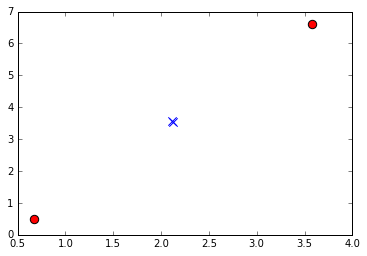

In [20]:
print(sess.run(W1),'\n')
print(sess.run(b1),'\n')

f1_out = sess.run(f1,{X: x_train, y: y_train})
print(f1_out,'\n')

plt.scatter(f1_out[t,0],f1_out[t,1],c='b',marker='x',s=70)
plt.scatter(f1_out[f,0],f1_out[f,1],c='r',marker='o',s=70)

The next layer $f^{(2)}(x)$ is the sigmoid function, which is a nonlinear transformation of the input, thus providing the possibility of transforming the problem to a new space where the outputs could be linearly separable.

[[ 0.66252404  0.6216141 ]
 [ 0.89270395  0.97244477]
 [ 0.89377505  0.97205329]
 [ 0.97272134  0.99866343]]


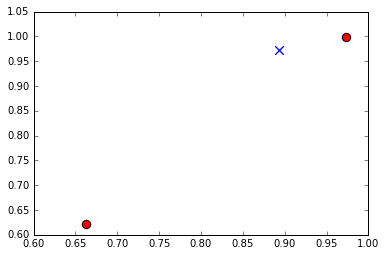

In [21]:
f2_out = sess.run(f2,{X: x_train, y: y_train})
print(f2_out)

plt.scatter(f2_out[t,0],f2_out[t,1],c='b',marker='x',s=70)
plt.scatter(f2_out[f,0],f2_out[f,1],c='r',marker='o',s=70)

The final layer is the model output:

In [22]:
print("y: ",sess.run(y,{X: x_train, y: y_train}),"\n")
print("model: ",sess.run(y_model,{X: x_train, y: y_train}))

y:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]] 

model:  [[ 0.08845341]
 [ 0.63328826]
 [ 0.63199496]
 [ 0.64158225]]


The network seems to have learned to classify the XOR problem correctly, thanks to the multi-layered structure and the non-linear activation function in the hidden layer. This example embodies the some of the primary reasons for employing deep learning models, especially for highly non-linear problems where traditional linear approaches fail.